# Sistemas Inteligentes

## Exercício Computacional 1 - Classificação

Neste laboratório serão explorados os classificadores **KNN** e **Decision Tree**. Também vamos explorar a métrica de **Acurácia** e conhecer a **Confusion Matrix**.

### Identificação do Aluno

#### Nome Completo

Jonatas Duarte Souza

#### RA

11036516

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [130]:
import sklearn.datasets as ds

digits_dataset = ds.load_digits()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [131]:
digits_img = digits_dataset.images

Verifique o formato de **digits_img**.

In [132]:
type(digits_img)

numpy.ndarray

Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [133]:
print(digits_img)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [134]:
import matplotlib.pyplot as plt

Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

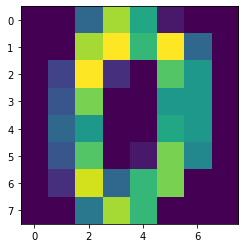

In [135]:
plt.imshow(digits_img[0])

Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas a nós, humanos, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não for importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [136]:
import numpy as np

Agora, com a biblioteca já importada, utilize a função **reshape()** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

In [137]:
digits = []

for img in digits_img:
    digits.append(np.reshape(img, 64))

Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

In [138]:
size = np.shape(digits)
original_size = np.shape(digits_img)
print(size)

x, y = size
pixels = x * y

x, y, z = original_size
original_pixels = x * y * z
print(pixels, original_pixels)

(1797, 64)
115008 115008


Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [139]:
digits_target = digits_dataset.target

Imprima **digits_target** para visualizar como são esses dados

In [140]:
print(digits_target)

[0 1 2 ... 8 9 8]


Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [141]:
print(np.shape(digits_target))

(1797,)


#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [142]:
from sklearn.model_selection import train_test_split

Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [143]:
x_train, x_test = train_test_split(digits, test_size=0.25)
y_train, y_test = train_test_split(digits_target, test_size=0.25)

Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [144]:
print(np.shape(x_train))

(1347, 64)


In [145]:
print(np.shape(x_test))

(450, 64)


In [146]:
print(np.shape(y_train))

(1347,)


In [147]:
print(np.shape(y_test))

(450,)


### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [148]:
from sklearn.neighbors import KNeighborsClassifier

Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [149]:
knn = KNeighborsClassifier(n_neighbors=5)

Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [150]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [151]:
y_pred = knn.predict(x_test)

#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix

Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [153]:
accuracy_score(y_test, y_pred)

0.07111111111111111

Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [154]:
confusion_matrix(y_test, y_pred)

array([[ 4,  8,  4,  2,  4,  4,  3,  1,  0,  4],
       [12,  5,  4,  5,  6,  3,  3,  5,  0,  6],
       [14,  6,  2,  5,  1,  4,  5,  4,  1,  3],
       [ 9,  8,  5,  2,  1,  6,  3,  2,  6,  2],
       [16,  7, 10,  3,  4,  0,  2,  4,  1,  5],
       [ 9,  3,  3,  4,  2,  4,  2,  4,  2,  5],
       [10,  8,  7,  5,  1,  4,  3,  2,  2,  3],
       [15,  5,  6, 10,  2,  5,  4,  1,  6,  2],
       [12,  9,  2,  3,  3,  6,  3,  2,  2,  4],
       [ 9,  2,  6,  4,  1,  3,  5,  2,  4,  5]])

### Decision Tree

#### Treinamento

In [155]:
from sklearn.tree import DecisionTreeClassifier

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [156]:
dt = DecisionTreeClassifier()

Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [157]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [158]:
y_pred = dt.predict(x_test)

#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [159]:
accuracy_score(y_test, y_pred)

0.09777777777777778

Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [160]:
confusion_matrix(y_test, y_pred)

array([[ 4,  1,  2,  6,  5,  3,  4,  2,  3,  4],
       [ 7, 11,  4,  4,  5,  4,  2,  2,  6,  4],
       [ 2,  4,  5,  7,  5,  6,  4,  3,  5,  4],
       [ 7,  1,  8,  4,  4,  5,  3,  5,  5,  2],
       [ 7,  4,  7,  3,  4,  3,  4,  6,  7,  7],
       [ 1,  3,  9,  6,  5,  2,  2,  1,  5,  4],
       [ 5,  3,  3,  7,  6,  4,  3,  6,  5,  3],
       [ 5,  6,  9,  2,  6,  6,  4,  7,  7,  4],
       [ 2,  3,  3, 10,  1,  5,  8,  6,  2,  6],
       [ 5,  3,  6,  6,  2,  4,  4,  4,  5,  2]])

## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

Acurácia é a porcentagem dos dados de testes que foram classificados corretamente; Não, pois se as classes estiverem distribuídas desproporcionalmente, a acurácia pode ser alta mesmo quando o classificador não é bom. Podemos utilizar outras métricas como a precisão, que é a porcentagem dos dados classificados como positivos que são realmente positivos, ou o recall, que é a porcentagem dos dados positivos que foram classificados como positivos.

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

Essa matriz informa como os dados de cada classe foram classificados, mostrando a quantidade de dados que foram classificados correta ou incorretamente pelo clasificador.

### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

As linhas representam o valor predito pelo classificador e as colunas representam o valor real dos dados. A diagonal principal representa os dados que foram classificados corretamente.

### 4. Seria possível avaliar, ainda que superficialmente, o desempenho de um classificador se utilizássemos apenas pixels em escala de cinza para representar os valores de uma matriz de confusão? Por que?

Sim, pois as quantidades da matriz poderiam ser traduzidas para escala de cinza e facilitando a visualização da distribuição dos dados pela matriz. Assim, quanto mais a diagonal principal estiver destacada, maior será a acurácia do classificador.

### 5. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

O número de vizinhos não pode ser muito alto, pois senão o algoritmo se adapta muito aos dados de treinamento, causando overfitting, nem muito pequenos, senão o algoritmo se adapta ao ruído dos dados de treinamento, causando underfitting. Além disso, é melhor escolher um número ímpar, para evitar empates durante a classificação.

### 6. Algum dos dois classificadores explorados neste laboratório é não paramétrico? Se sim, o que o permite fazer tal afirmação?

Sim, pois para utilizar a árvore de decisão não foi necessário definir nenhum parâmetro, enquanto que para utilizar o knn, foi preciso escolher a quantidade de vizinhos considerados para o treinamento.

### 7. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

A árvore se saiu melhor, pois teve uma acurácia maior; Não é possível afirmar, pois, mesmo a árvore de decisão ter se saído melhor, a diferença entre as acurácias dos dois classificadores não foi muito significativa, além de ambas terem sido muito baixas, indicando que não classificaram muito bem os dados dessa base.

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)